In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('final_data.csv')

In [3]:
data.head()

,job_title,rating,founded,type_of_ownership,industry,hourly,employer_provided,min_salary,max_salary,avg_salary,company_name,job_state,age,new_description,tool_python,tool_r_studio,tool_r-studio,tool_spark,tool_aws,tool_excel,tool_matlab,tool_tableau,tool_powerbi,tool_sql,company_size,revenue
0,Data Scientist (Remote),3.6,-1,Company - Private,Investment Banking & Asset Management,0,0,75,176,125.5,Manufacturers Bank,CA,-1,NEW DIGITAL BANK MISSION STATEMENT: Join us on...,1,0,0,1,0,0,0,1,0,0,201+,$50 to $100 million
1,Senior Data Scientist,3.6,2014,Company - Private,Internet,0,0,98,200,149.0,Shift,CA,8,About Shift: We believe car buying should be f...,1,0,0,1,1,1,0,1,0,1,1001+,Unknown / Non-Applicable
2,Principal Data Scientist,-1.0,-1,Contract,Computer Hardware & Software,0,1,150,180,165.0,CEDENT,TN,-1,- Role - Principal Data Scientist Location Nas...,1,0,0,1,1,0,0,0,0,0,1+,Less than $1 million
3,Sr Data Scientist,-1.0,-1,Contract,Computer Hardware & Software,0,1,100,135,117.5,CEDENT,GA,-1,"Title: :Sr Data Scientist Atlanta, GA Terms of...",1,0,0,1,1,0,0,1,1,1,1+,Less than $1 million
4,Sr. Data Scientist,-1.0,-1,Unknown,Unknown,1,1,85,85,85.0,Spotline Inc,Remote,-1,Responsibilities: Ability to demonstrate algor...,0,0,0,0,1,0,0,0,0,0,Unknown,Unknown / Non-Applicable


In [4]:
data.job_title.unique()

array(['Data Scientist (Remote)', 'Senior Data Scientist',
       'Principal Data Scientist', 'Sr Data Scientist',
       'Sr. Data Scientist', 'Lead Data Scientist', 'Data Scientist',
       'Senior Data Scientist (Remote)', 'Data Scientist - 100% Remote',
       'Data Scientist (Clearance Required)',
       'Remote Sensing Data Scientist - $150k/yr',
       'Data Scientist - North America',
       'Data Scientist - Machine Learning', 'Applied Scientist',
       'Data Scientist (Python/SQL)', 'Data Scientist I',
       'Data Scientist (USA Remote)', 'Optimization Data Scientist',
       'Finance Analytics Team -Data Scientist I', 'Data Scientist 2',
       'Staff Data Scientist', 'Computer Engineer (Data Scientist)',
       'Sr Data Scientist, SNKRS and Fairness',
       'Data Scientist - Intermediate', 'Jr. Data Scientist',
       'Cybersecurity Data Scientist - Bot Management',
       'Staff Data Scientist, Platform',
       'Data Scientist (Global Data and Analytics)',
       'Ligh

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    elif 'entry' in title.lower():
        return 'entry'
    else: 
        return 'na'

In [6]:
data['job_simplified'] = data['job_title'].apply(title_simplifier)

In [7]:
data.job_simplified.value_counts()

data scientist               865
na                            84
machine learning engineer     22
manager                       10
data engineer                  9
director                       9
Name: job_simplified, dtype: int64

In [8]:
data['seniority'] = data['job_title'].apply(seniority)

In [9]:
data.seniority.value_counts()

na        618
senior    375
junior      3
entry       3
Name: seniority, dtype: int64

In [10]:
data.job_state.value_counts()

 CA           395
Remote        137
 NY           107
 OR            53
 TX            39
 CO            37
 WA            33
California     32
 DC            31
 MA            22
 GA            20
 NV            15
 PA            12
 MD            12
 FL            10
Texas          10
 KY             7
 IL             6
 MO             5
 NC             4
 ME             3
Unknown         2
 NJ             2
 LA             1
 AZ             1
 VT             1
 TN             1
 VA             1
Name: job_state, dtype: int64

In [11]:
data['job_state'] = data['job_state'].replace({'Texas': 'TX'}).replace({'California': 'CA'})

In [12]:
data['job_state'] = data['job_state'].apply(lambda x: x.strip())

In [13]:
data.job_state.value_counts()

CA         427
Remote     137
NY         107
OR          53
TX          49
CO          37
WA          33
DC          31
MA          22
GA          20
NV          15
MD          12
PA          12
FL          10
KY           7
IL           6
MO           5
NC           4
ME           3
Unknown      2
NJ           2
TN           1
VA           1
AZ           1
LA           1
VT           1
Name: job_state, dtype: int64

In [14]:
data.min_salary

0       75
1       98
2      150
3      100
4       85
      ... 
994     75
995     75
996     75
997     75
998     75
Name: min_salary, Length: 999, dtype: int64

In [15]:
data['min_salary'] = data.apply(lambda x: x.min_salary * 2 if x.hourly == 1 else x.min_salary, axis = 1)
data['max_salary'] = data.apply(lambda x: x.max_salary * 2 if x.hourly == 1 else x.max_salary, axis = 1)

In [16]:
data.company_name.unique()

array(['Manufacturers Bank', 'Shift', 'CEDENT', 'Spotline Inc',
       'Infinity Consulting Solutions, Inc.', 'SunPower',
       'Cambridge Mobile Telematics', 'Celsius', 'Talent Source',
       'Nativo', 'E Inc.', 'creamitinc', 'BlueSky Technology Solutions',
       'Neal Analytics', 'Business Intelli Solutions', 'Herophilus',
       'Rocket Travel, Inc.', 'Gridiron IT', 'Bayer', 'Afresh',
       'Signifyd', 'Housecall Pro', 'Envision', 'Abound',
       'Data Ninjas Inc', 'Nike', 'WorkCog', 'HP', 'Twitch', 'Toyota',
       'Amazon.com Services LLC', 'Activision', 'RELX',
       'University of Kentucky', 'GEICO', 'Dell Technologies',
       'Intone Networks', 'Unum', 'Microsoft', 'DispatchHealth',
       'US Internal Revenue Service', 'PlayStation Global',
       'Mulligan Funding', 'Cloudflare', 'Slack', 'Circle K',
       'Teco Energy', 'Epirus', 'Wellstone Technologies', 'IBM',
       'Discord', 'Spotify', 'IGT', 'Hulu', 'BOLD',
       'National Security Agency', 'AMERICAN CANCER SO

<AxesSubplot:>

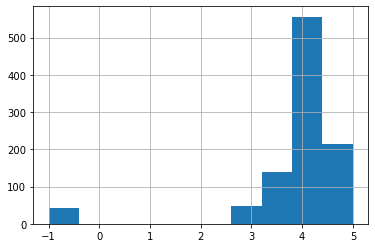

In [17]:
data.rating.hist()

Most company rating points lie between 3 to 5, while there are some exceptions where company's ratings are not given.

<AxesSubplot:>

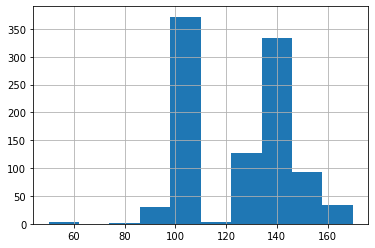

In [18]:
data.avg_salary.hist()

There is a wide diversity in the salary range. Most salaries offered lie between 80-100 grand and 120-150 grand.

<AxesSubplot:>

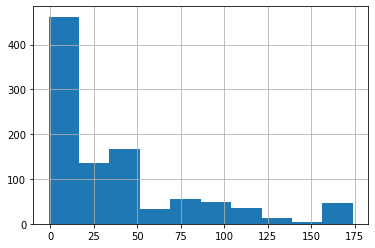

In [19]:
data.age.hist()

Most companies are still young, but there are also some companies operating for over a century.

# Visualization of company age, average salary and company rating data points

<AxesSubplot:>

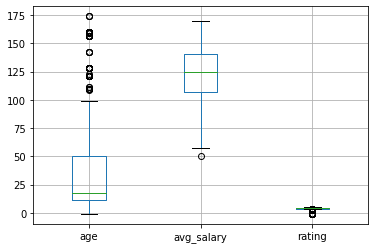

In [20]:
data.boxplot(column = ['age', 'avg_salary', 'rating'])

<AxesSubplot:>

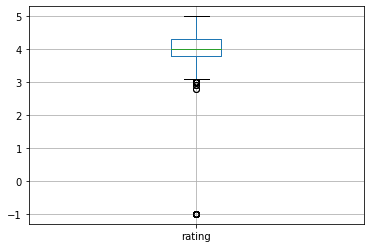

In [21]:
data.boxplot(column = 'rating')

In [22]:
data[['age', 'avg_salary', 'rating']].corr()

,age,avg_salary,rating
age,1.000000,0.021923,0.093448
avg_salary,0.021923,1.000000,-0.050290
rating,0.093448,-0.050290,1.000000


<AxesSubplot:>

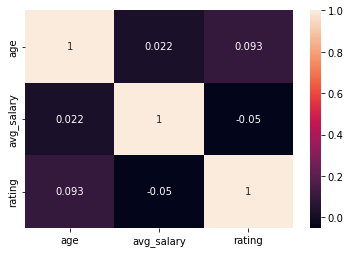

In [23]:
sns.heatmap(data[['age', 'avg_salary', 'rating']].corr(), annot = True)

There is no remarkable correlation between age, average salary and company rating.

In [24]:
data.columns

Index(['job_title', 'rating', 'founded', 'type_of_ownership', 'industry',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'job_state', 'age', 'new_description', 'tool_python',
       'tool_r_studio', 'tool_r-studio', 'tool_spark', 'tool_aws',
       'tool_excel', 'tool_matlab', 'tool_tableau', 'tool_powerbi', 'tool_sql',
       'company_size', 'revenue', 'job_simplified', 'seniority'],
      dtype='object')

In [25]:
cat_data = data[['job_state', 'company_size', 'type_of_ownership', 'industry', 
                 'revenue', 'tool_python', 'tool_r_studio', 'tool_r-studio', 
                 'tool_spark', 'tool_aws', 'tool_excel', 'tool_matlab', 
                 'tool_tableau', 'tool_powerbi', 'tool_sql', 'job_simplified', 
                 'seniority']]

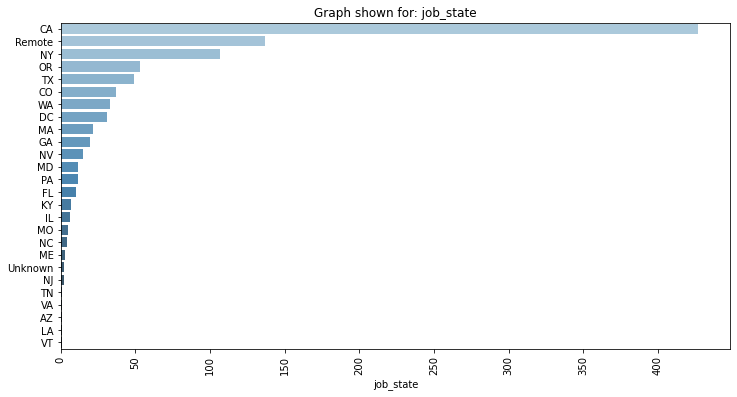

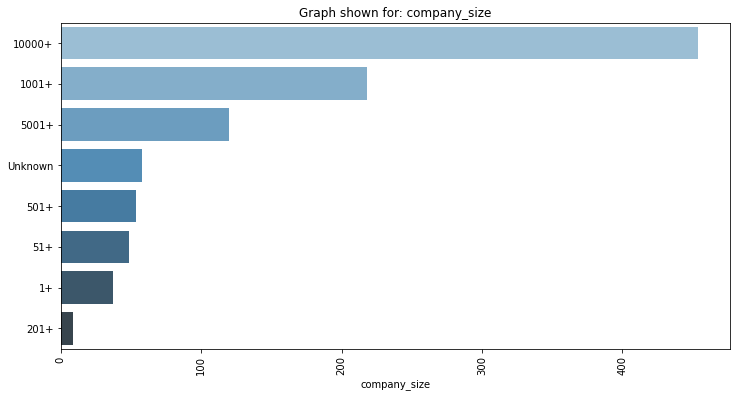

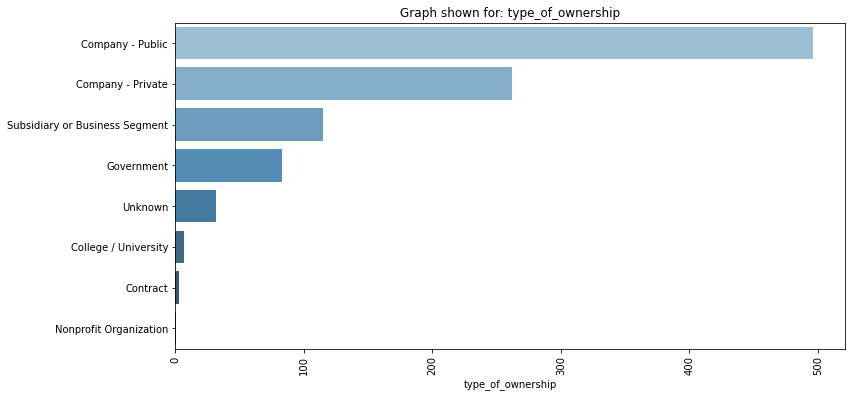

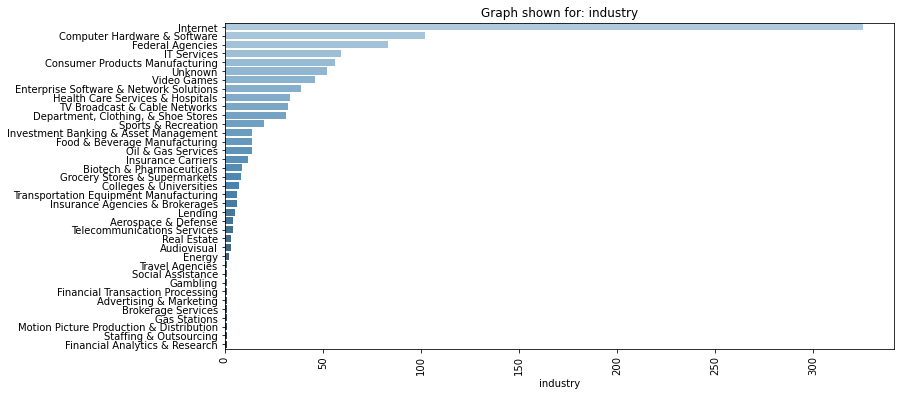

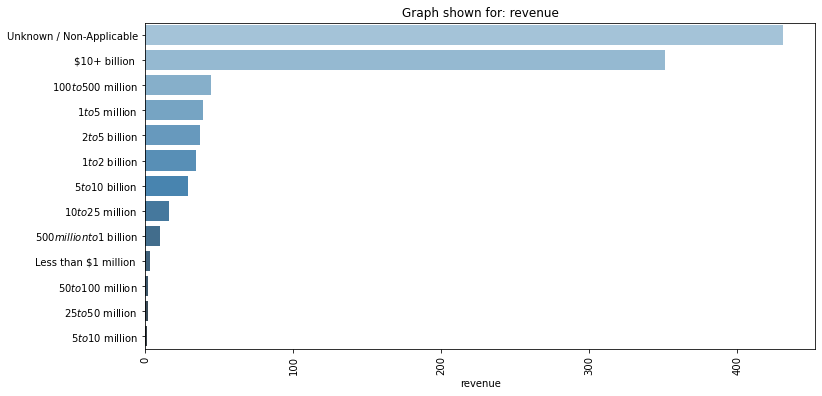

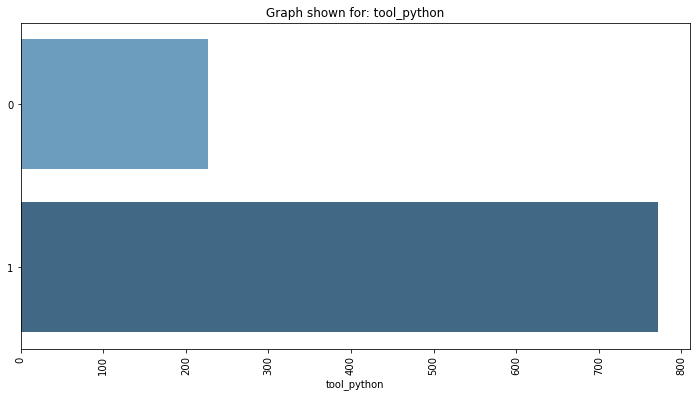

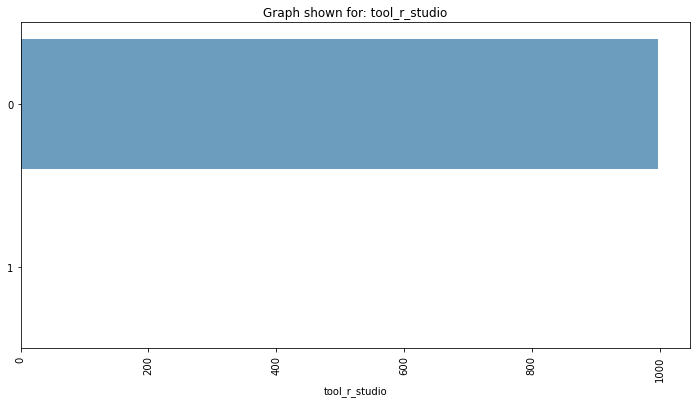

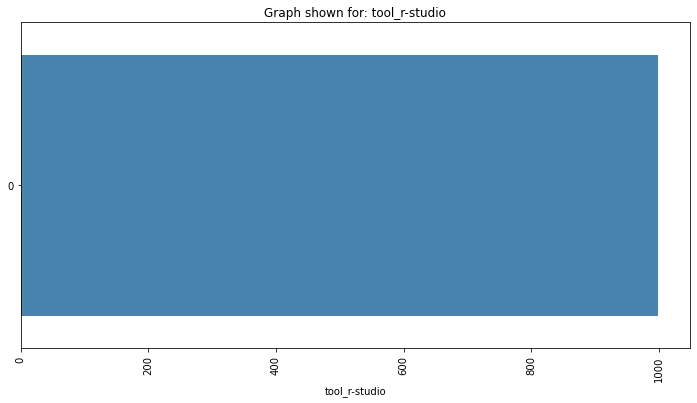

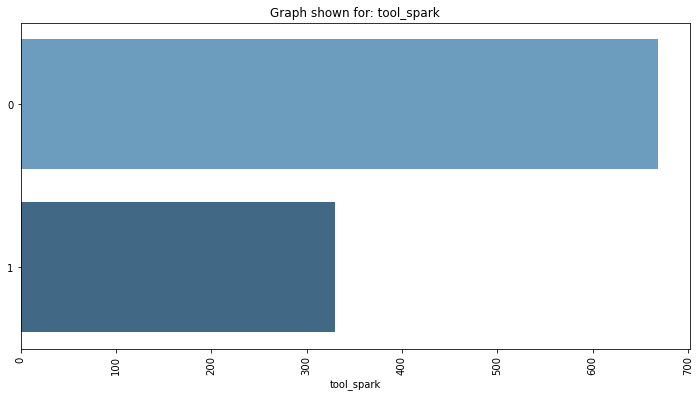

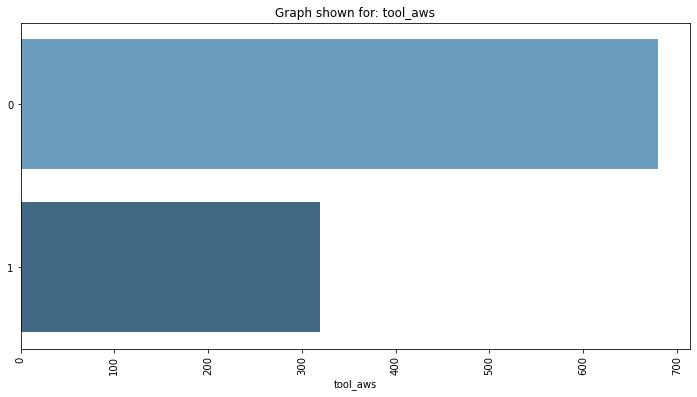

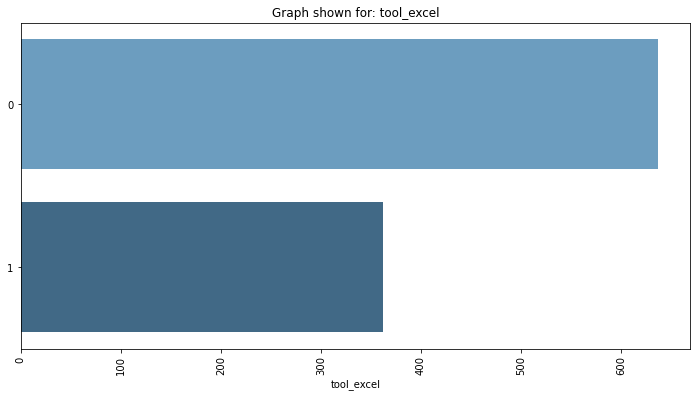

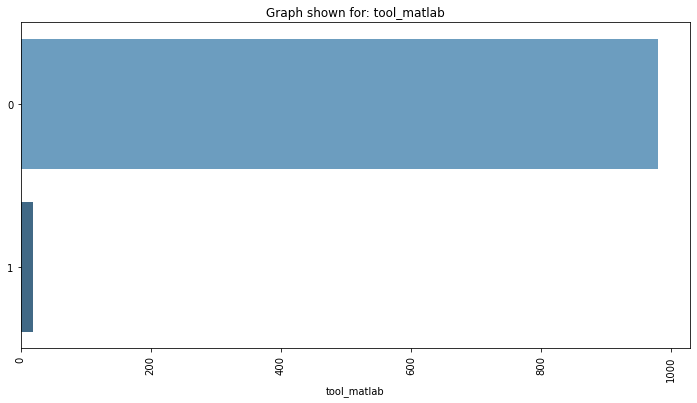

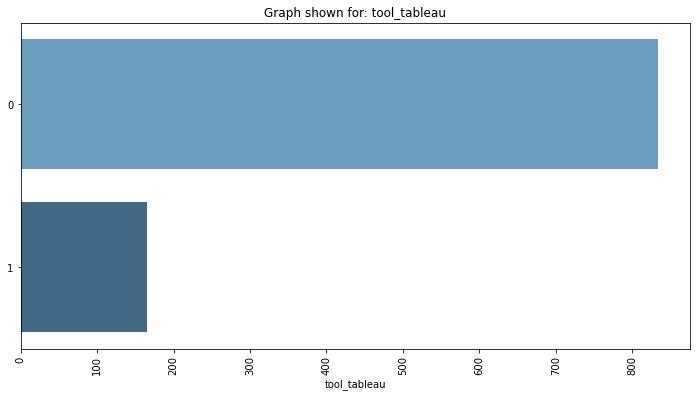

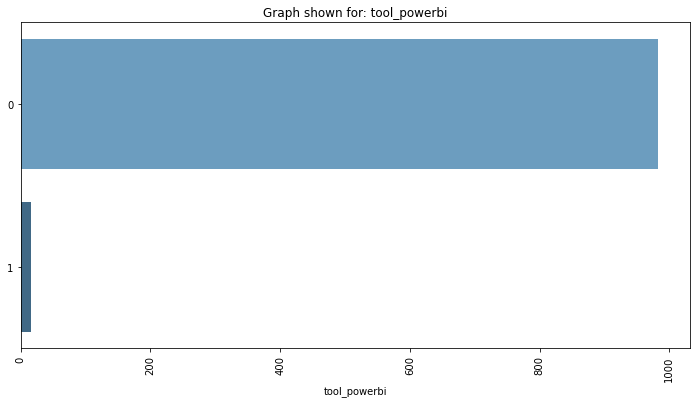

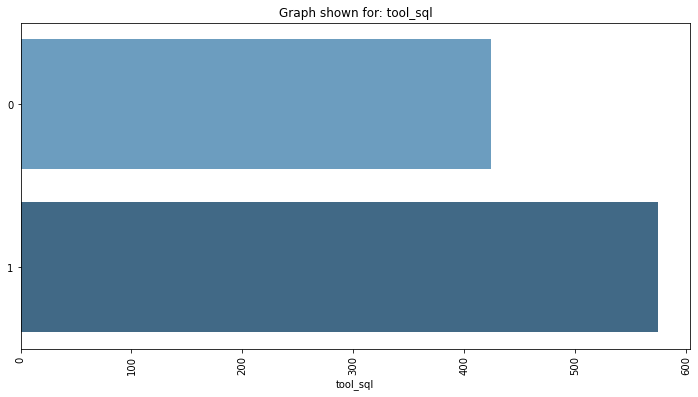

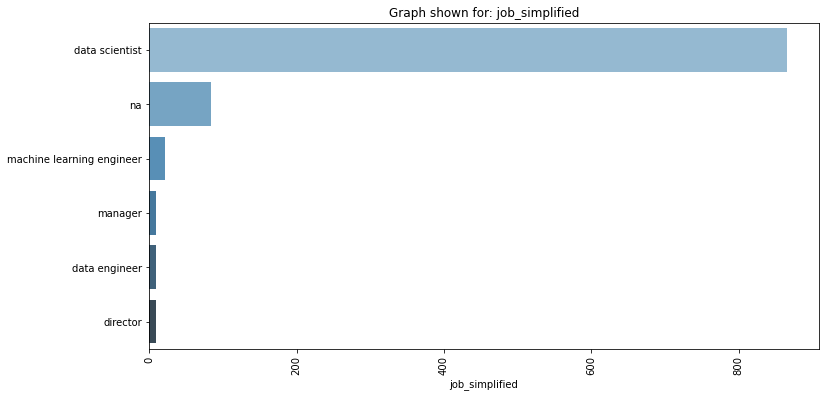

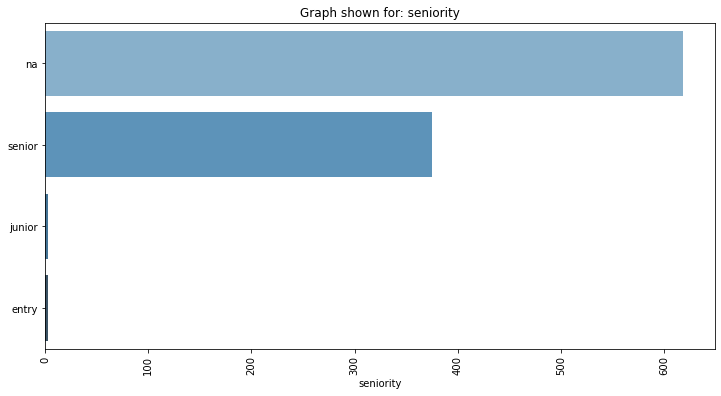

In [26]:
for i in cat_data.columns:
    plt.figure(figsize = (12, 6))
    sns.barplot(y = cat_data[i].value_counts().index, 
                x = cat_data[i].value_counts(),
                orient = 'h',
                data = cat_data,
                palette= 'Blues_d')
    plt.xticks(rotation=90)
    plt.title('Graph shown for: {}'.format(i))
    plt.show()

- Most companies scraped operate in California with the employee population
exceeds 10000 people.
- Public companies account for the highest proportion of firms looking for
data science positions. Same thing goes for companies working in the Internet
industry.
- Python, Spark, Aws, Excel, SQL are amongst the most sought skills and
technologies for these positions.


In [27]:
pd.pivot_table(data, index = 'job_simplified', values = 'avg_salary').sort_values(by = 'avg_salary', ascending = False)

,avg_salary
job_simplified,
manager,135.700000
director,130.388889
data scientist,126.523699
machine learning engineer,121.477273
na,119.880952
data engineer,112.277778


In [28]:
pd.pivot_table(data, index = ['job_simplified', 'seniority'], values = 'avg_salary')

avg_salary
job_simplified            seniority            
data engineer             entry      154.500000
                          na         107.000000
data scientist            entry      122.000000
                          junior     145.166667
                          na         126.878143
                          senior     125.852770
director                  na         132.125000
                          senior     129.000000
machine learning engineer na         121.477273
manager                   na         135.700000
na                        na         119.298246
                          senior     121.111111

In [29]:
pd.pivot_table(data, index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
TN,165.000000
AZ,154.500000
LA,154.500000
FL,145.800000
MD,143.500000
IL,142.333333
NJ,141.500000
KY,139.071429
MO,135.800000


In [30]:
data.columns

Index(['job_title', 'rating', 'founded', 'type_of_ownership', 'industry',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'job_state', 'age', 'new_description', 'tool_python',
       'tool_r_studio', 'tool_r-studio', 'tool_spark', 'tool_aws',
       'tool_excel', 'tool_matlab', 'tool_tableau', 'tool_powerbi', 'tool_sql',
       'company_size', 'revenue', 'job_simplified', 'seniority'],
      dtype='object')

In [31]:
df_pivots = data[['rating', 'type_of_ownership', 'industry', 'hourly', 'employer_provided', 'tool_python', 'tool_r_studio', 'tool_spark', 'tool_aws', 'tool_excel', 'tool_matlab', 'tool_tableau', 'tool_powerbi', 'tool_sql', 'revenue', 'avg_salary']]

In [32]:
print('Average salary by different criteria')
for i in df_pivots.columns[:-1]:
    print('\n')
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values(by = 'avg_salary', ascending = False), sep = '\n')

Average salary by different criteria


rating
        avg_salary
rating            
 3.2    154.500000
 4.9    151.500000
 3.3    146.500000
-1.0    130.904762
 4.1    130.687500
 5.0    130.653846
 3.5    129.943396
 3.8    127.708955
 4.5    127.565217
 4.6    126.828947
 3.9    125.430769
 4.4    125.252137
 3.4    124.535714
 4.2    124.033058
 4.3    122.956897
 3.0    122.833333
 4.0    122.754545
 3.1    120.900000
 3.7    119.986486
 2.8    119.750000
 3.6    118.166667
 2.9    112.833333


type_of_ownership
                                avg_salary
type_of_ownership                         
Nonprofit Organization          140.500000
College / University            139.071429
Unknown                         132.671875
Contract                        128.833333
Company - Private               126.998092
Subsidiary or Business Segment  126.291304
Company - Public                124.760081
Government                      124.126506


industry
                                     

In [33]:
data[data.type_of_ownership == 'Nonprofit Organization']

,job_title,rating,founded,type_of_ownership,industry,hourly,employer_provided,min_salary,max_salary,avg_salary,company_name,job_state,age,new_description,tool_python,tool_r_studio,tool_r-studio,tool_spark,tool_aws,tool_excel,tool_matlab,tool_tableau,tool_powerbi,tool_sql,company_size,revenue,job_simplified,seniority
78,Data Scientist - Remote,3.7,1913,Nonprofit Organization,Social Assistance,0,0,112,169,140.5,AMERICAN CANCER SOCIETY,GA,109,"This position is a remote role, open anywhere ...",0,0,0,0,0,0,0,0,0,0,5001+,Unknown / Non-Applicable,data scientist,na


In [34]:
pd.pivot_table(df_pivots, index = 'revenue', columns = 'tool_python', values = 'avg_salary').sort_values(by = 1, ascending = False)

tool_python,0,1
revenue,,
$25 to $50 million,NaN,150.750000
$500 million to $1 billion,NaN,142.150000
$10 to $25 million,NaN,135.687500
$100 to $500 million,115.600000,129.256410
Less than $1 million,NaN,128.833333
$10+ billion,125.021127,127.500000
$1 to $5 million,NaN,127.435897
$2 to $5 billion,139.071429,125.833333
$1 to $2 billion,119.750000,124.734375


In [35]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [36]:
data.new_description

0      NEW DIGITAL BANK MISSION STATEMENT: Join us on...
1      About Shift: We believe car buying should be f...
2      - Role - Principal Data Scientist Location Nas...
3      Title: :Sr Data Scientist Atlanta, GA Terms of...
4      Responsibilities: Ability to demonstrate algor...
                             ...                        
994    Job Description Join a high impact, customer-o...
995    Do you like to work for a forward thinking tec...
996    To get the best candidate experience, please c...
997    Data scientists at Disney Streaming Services a...
998    Help This job is open to The public U.S. Citiz...
Name: new_description, Length: 999, dtype: object

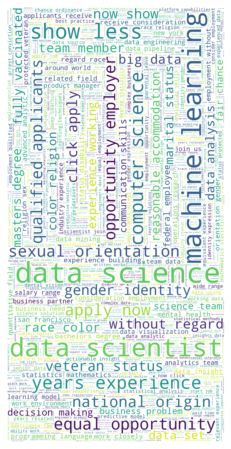

In [37]:
words = " ".join(data['new_description'])

def punctuation_stop(text):
    # remove punctuation and stopwords
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for word in word_tokens:
        if word not in stop_words and word.isalpha():
            filtered.append(word.lower())
    return filtered

word_filtered = punctuation_stop(words)

text = " ".join([element for element in word_filtered])

wc = WordCloud(background_color = 'white', random_state = 2002, stopwords = STOPWORDS, max_words = 2000, width = 800, height = 1600)
wc.generate(text)

plt.figure(figsize = (16, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()
                     

In [38]:
data.head()

,job_title,rating,founded,type_of_ownership,industry,hourly,employer_provided,min_salary,max_salary,avg_salary,company_name,job_state,age,new_description,tool_python,tool_r_studio,tool_r-studio,tool_spark,tool_aws,tool_excel,tool_matlab,tool_tableau,tool_powerbi,tool_sql,company_size,revenue,job_simplified,seniority
0,Data Scientist (Remote),3.6,-1,Company - Private,Investment Banking & Asset Management,0,0,75,176,125.5,Manufacturers Bank,CA,-1,NEW DIGITAL BANK MISSION STATEMENT: Join us on...,1,0,0,1,0,0,0,1,0,0,201+,$50 to $100 million,data scientist,na
1,Senior Data Scientist,3.6,2014,Company - Private,Internet,0,0,98,200,149.0,Shift,CA,8,About Shift: We believe car buying should be f...,1,0,0,1,1,1,0,1,0,1,1001+,Unknown / Non-Applicable,data scientist,senior
2,Principal Data Scientist,-1.0,-1,Contract,Computer Hardware & Software,0,1,150,180,165.0,CEDENT,TN,-1,- Role - Principal Data Scientist Location Nas...,1,0,0,1,1,0,0,0,0,0,1+,Less than $1 million,data scientist,senior
3,Sr Data Scientist,-1.0,-1,Contract,Computer Hardware & Software,0,1,100,135,117.5,CEDENT,GA,-1,"Title: :Sr Data Scientist Atlanta, GA Terms of...",1,0,0,1,1,0,0,1,1,1,1+,Less than $1 million,data scientist,senior
4,Sr. Data Scientist,-1.0,-1,Unknown,Unknown,1,1,170,170,85.0,Spotline Inc,Remote,-1,Responsibilities: Ability to demonstrate algor...,0,0,0,0,1,0,0,0,0,0,Unknown,Unknown / Non-Applicable,data scientist,senior


In [39]:
data.to_csv('eda_data.csv', index = None)